In [1]:
from preamble import *
%matplotlib inline

### 2.3 有监督学习算法
#### 2.3.2 K 近邻算法
##### 1. k-近邻 分类器

-   k-近邻 分类器有 2 个重要参数
    -   邻居个数
    -   数据点之间距离的度量方法

注1：左上角的数据点n_neighbors=1时与其他的不同

注2：测试数据点并没有正确的值，是随意确定的几个值，观察它们如何受n_neighbor的影响

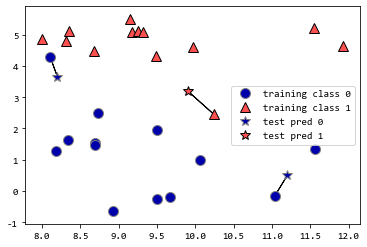

In [2]:
# 1-近邻模型对 forge 数据集的预测结果
mglearn.plots.plot_knn_classification(n_neighbors=1)

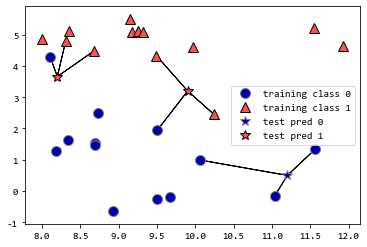

In [3]:
# 3-近邻模型对 forge 数据集的预测结果
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
# k-近邻分类算法的使用
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
print("测试集预测：", clf.predict(X_test))

测试集预测： [1 0 1 0 1 0 0]


In [8]:
print("测试集精度： {:.2f}".format(clf.score(X_test, y_test)))

测试集精度： 0.86


##### 2. 分析 k-近邻 分类器

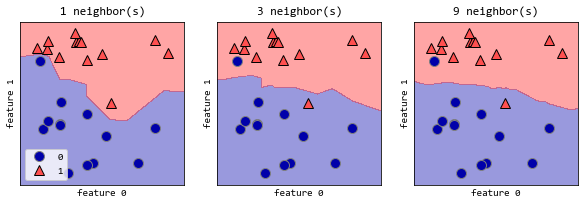

In [9]:
# 不同 n_neighbors 值的 k-近邻模型的决策边界
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

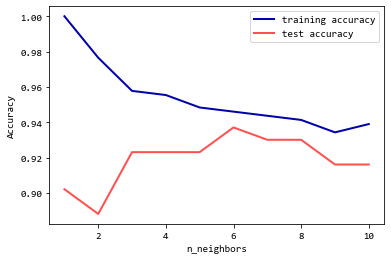

In [10]:
# 模型复杂度与泛化能力之间的关系
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

##### 3. k-近邻 回归

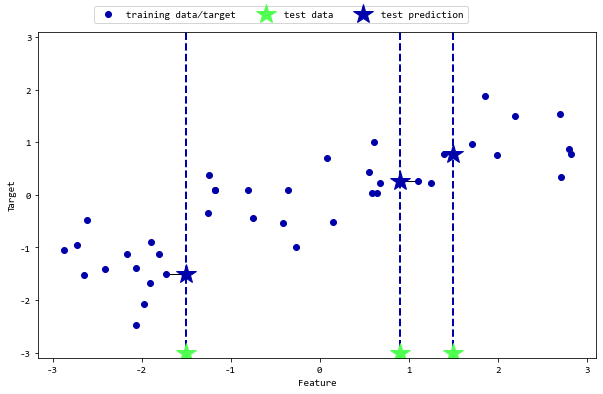

In [11]:
# 1-近邻回归对 wave 数据集的预测结果
mglearn.plots.plot_knn_regression(n_neighbors=1)

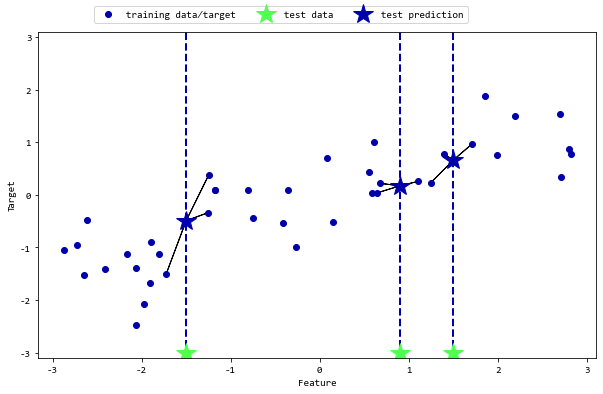

In [12]:
# 3-近邻回归对 wave 数据集的预测结果
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [13]:
# k-近邻回归算法的使用
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
print("测试集预测：\n", reg.predict(X_test))

测试集预测：
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [15]:
# R^2分数，叫做决定系数，是回归模型预测的优度度量。
'''The coefficient R^2 is defined as (1 - u/v), 
where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). 
A constant model that always predicts the expected value of y, 
disregarding the input features, would get a R^2 score of 0.0.'''
print("测试集 R^2: {:.2f}".format(reg.score(X_test, y_test)))

测试集 R^2: 0.83


#### 4. 分析 KNeighborsRegressor

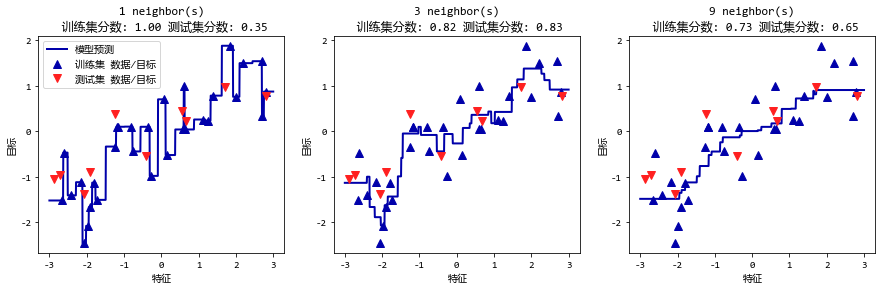

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n 训练集分数: {:.2f} 测试集分数: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("特征")
    ax.set_ylabel("目标")
axes[0].legend(["模型预测", "训练集 数据/目标",
                "测试集 数据/目标"], loc="best")

##### 5. 优点、缺点和参数

-   优点：
    -   模型容易理解；
    -   不需要过多调节就可以获得好的性能
-   缺点：
    -   对于特征数目过多的数据集效果不好；
    -   对于特征取值多数为 0 的数据集 ( 稀疏数据集 ) 效果不好
-   2个重要参数：
    -   邻居个数
    -   数据点之间距离的度量方法